# 패스트캠퍼스 검색광고 데이터 분석

## 데이터의 구성 : 


## 분석목표 : 
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

## 분석과정 : 
1. 데이터 전처리
2. 데이터 탐색
3. 시각화
4. 데이터분석

### 1. 데이터 전처리
- 학습목표 : 
 1. read_excel함수를 사용하여 파이썬에 데이터 불러오기 
 2. 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


### # read_excel함수를 사용하여 파이썬에 데이터 불러오기


In [4]:

df=pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/네이버보고서.xls')

In [5]:
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.04991,295.975,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.66,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593,1175174


### # skiprows 함수 사용으로 불필요한 행 제거

In [6]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/네이버보고서.xls', skiprows=[0])


In [7]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


### # 결측치 확인

In [8]:
df.isnull()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1376,False,False,False,False,False,False,False
1377,False,False,False,False,False,False,False
1378,False,False,False,False,False,False,False
1379,False,False,False,False,False,False,False


In [9]:
# 결측치 확인 - 열단위
df.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

### # 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기
- 클릭수(반올림처리, 일의 자리수로 변경)
- 클릭률
- 평균클릭비용(VAT포함,원)

- 클릭수 : 한 번의 클릭이 총 몇 번 이루어졌는지 나타내는 지표<br>
=> 반올림처리, 일의 자리수로 변경

In [10]:
# 클릭수 열에 round함수 적용
clk = round(df['클릭수'],0)

In [11]:
clk

0       9606.0
1       8058.0
2        324.0
3       1864.0
4        814.0
         ...  
1376       0.0
1377       0.0
1378       0.0
1379       0.0
1380       0.0
Name: 클릭수, Length: 1381, dtype: float64

In [12]:
df['클릭수'] = clk.astype(int)

In [13]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
4,3. html,HTML,9626374,814,0.008452,1408.435349,1145903




*   클릭률 : CTR = 클릭수 / 노출수 * 100<br>

  => 클릭수가 변경되어 기존 클릭률(%) 열 데이터 변경 필요



In [14]:
df['클릭률(%)'] = df['클릭수']/df['노출수'] * 100

In [15]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
4,3. html,HTML,9626374,814,0.008456,1408.435349,1145903


- 평균클릭비용 : 칼럼명에 원 단위로 명시됨<br>
=> 반올림처리, 일의 자리수로 변경

In [16]:
cpc = round(df['평균클릭비용(VAT포함,원)'],0)
df['평균클릭비용(VAT포함,원)'] = cpc.astype(int)

In [17]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,631,1175174
4,3. html,HTML,9626374,814,0.008456,1408,1145903


In [18]:
df.shape


(1381, 7)

In [19]:
 #describe() - 각 열에 대한 기술통계량
#데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위수, 최대값
#지수 표기법(Exponential Notation, 10**n)
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.504707,0.352023,981.624909,3.791958e+04
std,2.964650e+05,387.513479,1.000998,1372.401050,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.000000,0.006539,64.000000,7.700000e+01
50%,3.805000e+03,4.000000,0.056721,396.000000,2.123000e+03
75%,1.073400e+04,14.000000,0.243309,1303.000000,1.743500e+04
max,9.626374e+06,9606.000000,13.590551,9363.000000,2.512444e+06


In [20]:
#pandas출력 옵션설정 - float형식으로 수치표기  
pd.set_option('display.float_format', '{:.2f}'.format) # 항상 float 형식으로

In [21]:
#describe()
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.50,0.35,981.62,37919.58
std,296465.03,387.51,1.00,1372.40,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.00,0.01,64.00,77.00
50%,3805.00,4.00,0.06,396.00,2123.00
75%,10734.00,14.00,0.24,1303.00,17435.00
max,9626374.00,9606.00,13.59,9363.00,2512444.00


In [22]:
#columns - 칼럼명 반환
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [23]:
#unique() - 열(시리즈)의 고유값
#df['광고그룹']
df['광고그룹'].unique()

array(['올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵', '올인원 패키지 : 업무자동화_VBA',
       'ㅍAOP 전체_중복키워드_디자인(삭제)', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', 'JavaScript BOOT CAMP', '1. 일반_PC',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [24]:
#len, unique()
#df['광고그룹']
len(df['광고그룹'].unique())

186

In [25]:
#unique()
#df['키워드']
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [26]:
#len, unique()
#df['키워드']
len(df['키워드'].unique())

1112

In [27]:
#value_counts() - 열의 고유값 빈도
#df['광고그룹']
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀            93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            46
타이포그래피와 편집디자인                    26
                                 ..
올인원 패키지 : 콘텐츠 마케팅_콘텐츠 제작          1
모바일 앱 UX/UI 디자인                   1
자율주행 연구를 위한 ROS·SLAM Workshop     1
fin_camp_business_4               1
올인원 패키지 : 데이터 분석 입문(파컨)           1
Name: 광고그룹, Length: 186, dtype: int64

In [28]:
#value_counts()
#df['키워드']
df['키워드'].value_counts()

-          8
구글광고       5
포토샵        5
GUI        5
퍼포먼스마케팅    4
          ..
쿠다         1
RTB        1
INDEX      1
부동산스터디     1
JUPYTER    1
Name: 키워드, Length: 1112, dtype: int64

In [29]:
#sort_values() - 정렬(default : 오름차순)
#노출수 기준 정렬
df['노출수'].sort_values()

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [30]:
#sort_values(ascending=False) - 내림차순 정렬
#노출수 기준 정렬
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

# 시각화를 통한 데이터 탐색 실습

- 학습목표 : 
 1. 현업의 데이터를 사용하여 데이터 시각화를 실습한다.
 2. 데이터를 가공,처리하여 시각화를 진행한다.

- chapter1 - 03. 시각화 라이브러리 matplotlib  
- 시리즈 시각화

In [31]:
#노출수 칼럼 시각화
#데이터프레임 시각화 <-> 시리즈 시각화
#type함수
type(df['노출수'])

pandas.core.series.Series

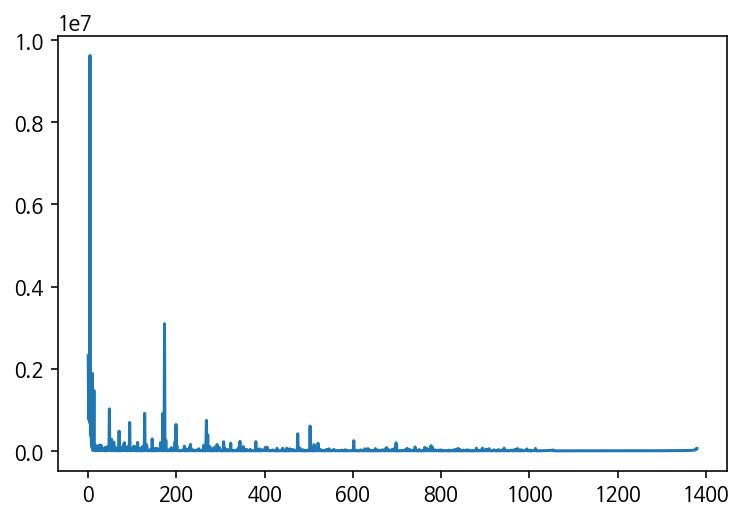

In [32]:
#plotting
df['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [33]:
#보충예제 - chapter 1 - 03. 시각화 라이브러리 matplotlib 
dict_data={"철수":[1,2,3,4],"영희":[2,3,4,5],"민수":[3,4,5,6],"수진":[4,5,6,7]}
data=DataFrame(dict_data)
#철수 칼럼(데이터프레임의 열 = 시리즈 자료구조) 출력
data['철수']

0    1
1    2
2    3
3    4
Name: 철수, dtype: int64

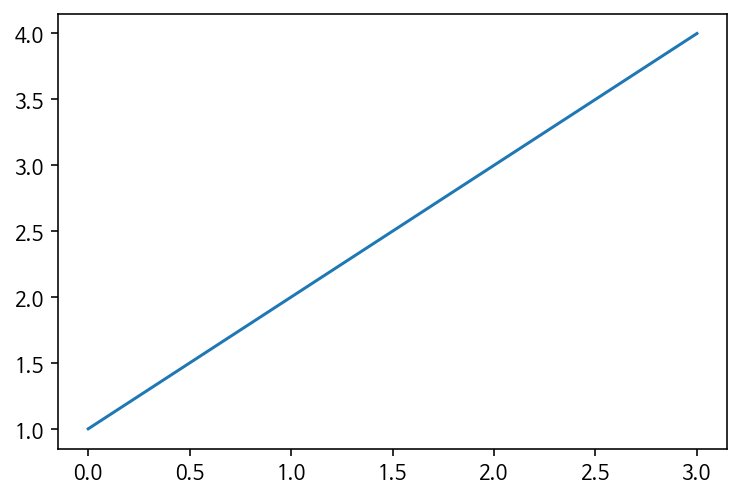

In [34]:
#plotting
#시리즈의 index가 x축, value가 y축
data['철수'].plot()
plt.show()

In [35]:
#시리즈의 index가 x축, value가 y축
df['노출수'].head()

0    2319456
1     767491
2    1137840
3     694106
4    9626374
Name: 노출수, dtype: int64

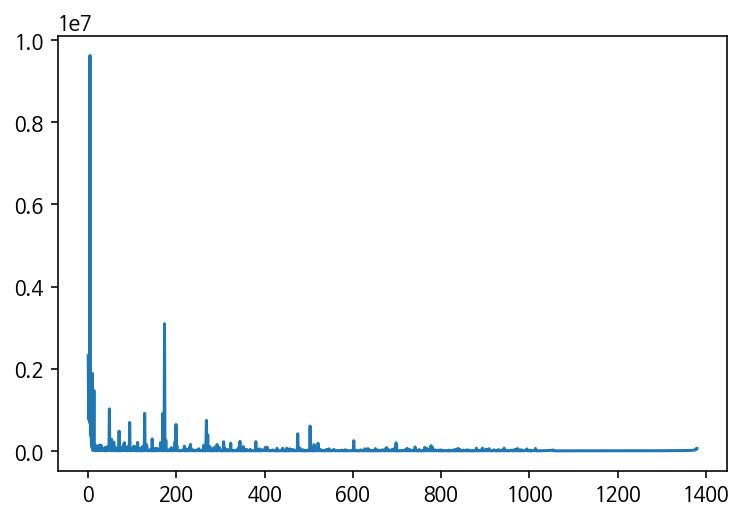

In [36]:
#plotting
df['노출수'].plot()
plt.show()

- 패턴이 명확하게 드러나도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [37]:
#2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
#노출수 칼럼, sort_values()
imp_sort = df['노출수'].sort_values()

In [38]:
#imp_sort 변수 출력
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [39]:
#reset_index() - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
imp_sort = imp_sort.reset_index()

In [40]:
#imp_sort 변수 출력
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [41]:
#drop('삭제할 인덱스명', axis=1) - 삭제(열 기준)
imp_sort.drop('index', axis=1,inplace=True)

In [42]:
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


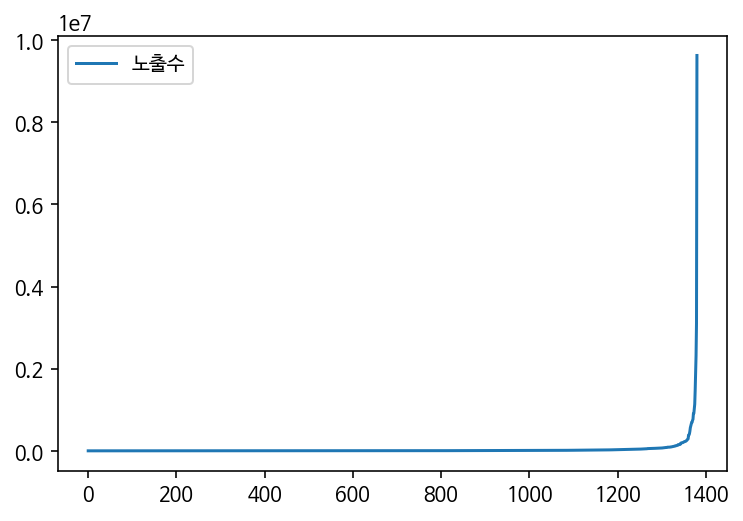

In [43]:
#imp_sort plotting
imp_sort.plot()
plt.show()

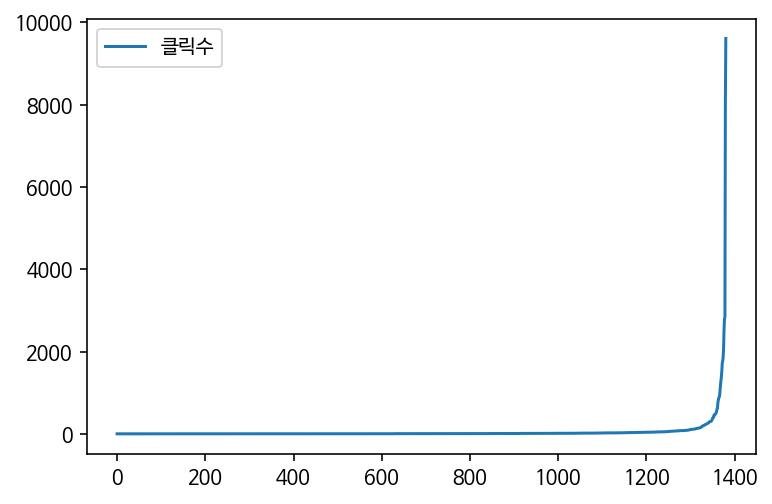

In [44]:
#클릭수칼럼 시각화 
#sort_values(),reset_index(),drop('index',axis=1),plot - 한줄 코딩(괄호사용)
(df['클릭수'].sort_values()).reset_index().drop('index', axis=1).plot()
plt.show()

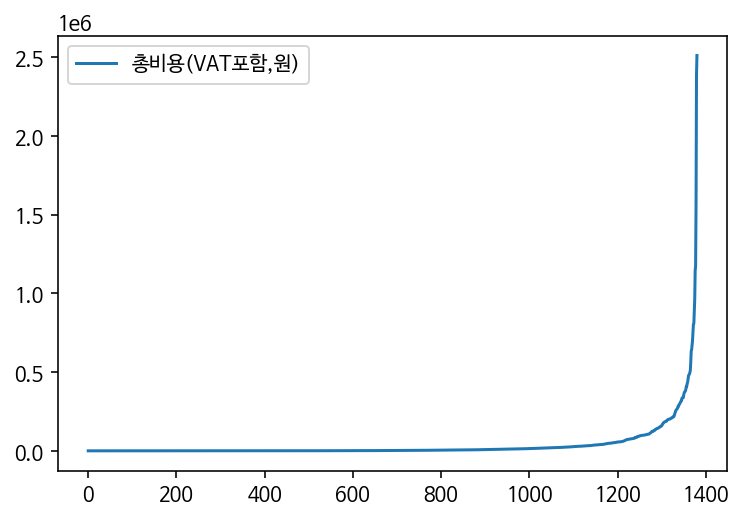

In [45]:
#총비용칼럼 시각화
#위 코드에서 칼럼명만 변경
(df['총비용(VAT포함,원)'].sort_values()).reset_index().drop('index', axis=1).plot()
plt.show()

# 데이터 분석
- 학습목표 : 
 1. 파이썬과 판다스를 사용하여 데이터를 처리, 분석할 수 있다.

## 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출 
 1. 95백분위수 찾기(quantile 함수 사용)
 2. 95백분위수 이상(상위 5%)의 노출수 추출
 3. 상위 5%에 해당하는 키워드 추출

In [46]:
#노출수 칼럼 imp변수에 할당
imp = df['노출수']

In [47]:
#1. 95백분위수 찾기
#quantile - 분위수 출력(default : 2사분위수(중앙값))
imp.quantile()

3805.0

In [48]:
#median - 중앙값
imp.median()

3805.0

In [49]:
#quantile(0) - 최소값
print(imp.quantile(0))
print(imp.min())

1001.0
1001


In [50]:
#quantile(1) - 최대값
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [51]:
#95백분위수 = quantile(0.95)
imp.quantile(0.95)

82858.0

In [52]:
#2. 95백분위수 이상(상위 5%)의 노출수 추출
#series[condition]
imp = imp[imp>=imp.quantile(0.95)]

In [53]:
#imp 출력
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

3. 상위 5%에 해당하는 키워드 추출<br>
 -기존 상위 노출수 추출과정
   1. as-is : 데이터프레임의 기본숫자인덱스 
   2. to-be : 데이터프레임의 인덱스를 '키워드'로 재설정

In [54]:
#실습예제 원본
#head()
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,631,1175174
4,3. html,HTML,9626374,814,0.01,1408,1145903


In [55]:
#데이터프레임의 인덱스를 키워드로 변경
#set_index('키워드')
df_index = df.set_index('키워드')

In [56]:
#df_index 
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606,0.41,262,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.05,296,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324,0.03,4842,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.27,631,1175174
HTML,3. html,9626374,814,0.01,1408,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0,0.00,0,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0,0.00,0,0
LTV,마케팅KPI수립,32602,0,0.00,0,0


In [57]:
#df_index에서 imp변수 생성 및 quantile(0.95)
imp=df_index['노출수']

In [58]:
#imp 노출수 상위 5% 키워드 추출
imp = imp[imp>=imp.quantile(0.95)]

In [59]:
#imp 변수 출력
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [60]:
#df_index에서 클릭수 상위 5% 키워드 추출
clk = df_index['클릭수']
clk = clk[clk>=clk.quantile(0.95)]

In [61]:
#clk 변수 출력, 클릭수 상위 5% 키워드 출력
clk

키워드
-          9606
-          8058
일러스트        324
-          1864
HTML        814
           ... 
재태크         126
모스자격증       198
펀드하는법       248
채권투자        136
주식투자하는법     120
Name: 클릭수, Length: 70, dtype: int64

### # 중점관리키워드 선별
 - 노출수와 클릭수 모두 95백분위수 이상
 
### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [62]:
#df_index에서 imp, clk 변수 생성
imp = df_index['노출수']
clk = df_index['클릭수']

In [63]:
#노출수와 클릭수 모두 상위5%(95백분위수 이상) 추출
result = df_index[(imp>=imp.quantile(0.95)) & (clk>=clk.quantile(0.95))]

In [64]:
#result변수 출력
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606,0.41,262,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.05,296,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324,0.03,4842,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.27,631,1175174
HTML,3. html,9626374,814,0.01,1408,1145903
파이썬,6. 파이썬,384522,260,0.07,3705,964876
코딩,1. 코딩,562162,271,0.05,3243,879560
C언어,2. C언어 일반,271370,154,0.06,5269,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838,3.11,283,803770


In [65]:
#index - 중점관리키워드 출력
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵',
       '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### # 저효율키워드 선별

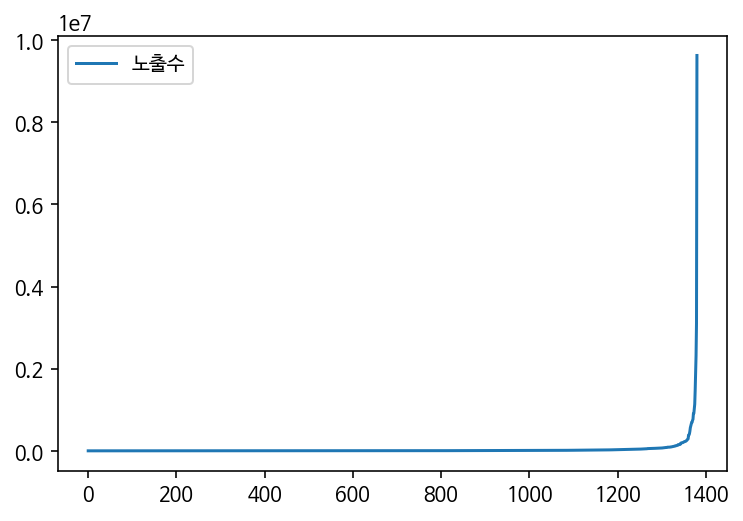

In [66]:
#노출수 선그래프
imp_sort.plot()
plt.show()

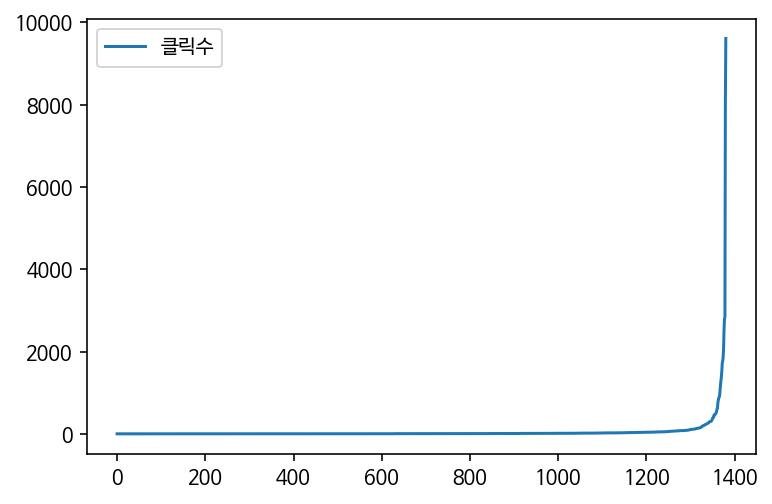

In [67]:
#클릭수 선그래프
(((df['클릭수'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

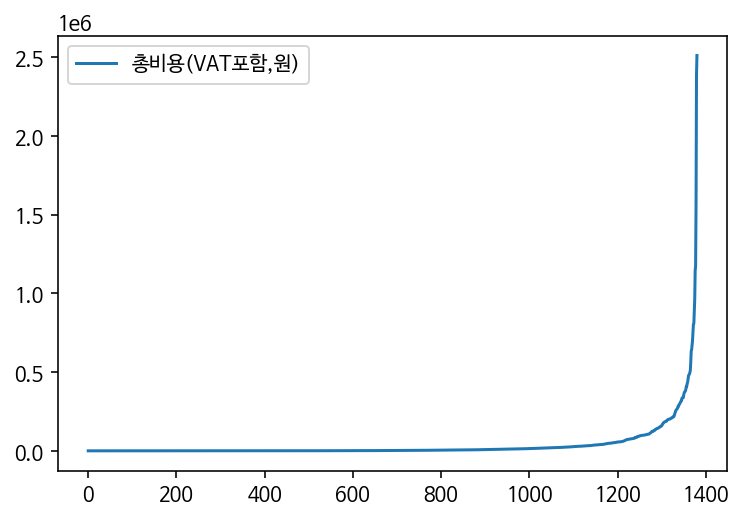

In [68]:
#총비용 선그래프
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

- 노출수, 클릭수  기준 상위 5%의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 키워드
 1. 노출수 95백분위수 미만
 2. 클릭수 95백분위수 미만
 3. 총비용 85백분위수 이상
 4. 총비용 95백분위수 미만
 
 ### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [69]:
#df_index로 cost 변수 생성
cost = df_index['총비용(VAT포함,원)']

In [70]:
# 데이터프레임[(조건문)&(조건문)]
result = df_index[(imp<imp.quantile(0.95)) & (clk<clk.quantile(0.95)) &( cost>=cost.quantile(0.85)) & (cost < cost.quantile(0.95)) ]

In [71]:
#index - 저효율키워드 출력
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분

# 광고그룹 분석
- 학습목표 : 
 1. groupby함수 사용실습
 2. 키워드 분석과정에서 진행한 코딩 복습


### as-is : 키워드  기준 분석
- 키워드의 노출수/클릭수/총비용...

### to-be : 광고그룹 기준 분석
- 데이터의 구성을 광고그룹 기준으로 변경해야함
- 광고그룹의 노출수/클릭수/총비용...
- groupby 함수 사용

In [72]:
#groupby - 전달된 열을 기준으로 전체 데이터를 분류
grouped = df.groupby('광고그룹')

In [73]:
#해당변수 출력시 객체정보만 출력됨
grouped
#데이터를 살펴보기 위하여는 집계함수 사용해야 함

In [74]:
#count - 각 광고그룹 데이터의 개수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [75]:
#mean -각 광고그룹 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.35,0.18,625.06,7243.96
001.BASIC DESIGN,5738.56,6.67,0.23,298.67,2427.33
001.데이터분석/ 통계,3715.00,20.20,0.89,1021.70,19575.60
002.R,13413.78,8.67,0.11,360.00,4796.00
002.UX/UI,3090.80,4.00,0.08,70.00,550.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.69,16.77,0.05,648.38,15781.62
프로그래밍 유치원,5921.62,7.75,0.23,2032.50,23617.00
프로그래밍 전체,90375.00,9.17,0.02,123.92,1626.17


In [76]:
#median - 그룹 데이터의 중앙값
grouped.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.00,4.00,0.05,766.00,2458.50
001.BASIC DESIGN,5524.00,2.00,0.03,358.00,1023.00
001.데이터분석/ 통계,1813.00,13.50,0.57,1097.00,13464.00
002.R,5184.00,4.00,0.03,119.00,1287.00
002.UX/UI,2649.00,1.00,0.08,73.00,88.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.00,4.00,0.02,853.00,2706.00
프로그래밍 유치원,3748.00,3.00,0.11,1764.00,8002.50
프로그래밍 전체,3455.50,1.00,0.01,130.50,225.50


In [77]:
#std - 그룹 데이터의 표준편차
grouped.std()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.11,17.70,0.32,472.81,15854.71
001.BASIC DESIGN,4182.62,9.10,0.46,176.19,3220.04
001.데이터분석/ 통계,4109.84,18.30,0.82,269.78,19127.40
002.R,19333.63,14.76,0.17,371.79,10077.59
002.UX/UI,1996.65,7.31,0.11,69.27,1005.28
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,188247.58,35.38,0.07,470.90,37543.64
프로그래밍 유치원,6642.34,9.87,0.26,1649.54,37088.92
프로그래밍 전체,200385.15,17.26,0.03,120.05,2801.70


In [78]:
#var - 그룹 데이터의 분산
grouped.var()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,1891824593.19,313.38,0.10,223547.29,251371923.49
001.BASIC DESIGN,17494344.53,82.75,0.21,31044.00,10368671.50
001.데이터분석/ 통계,16890757.78,335.07,0.68,72783.79,365857245.60
002.R,373789206.44,217.75,0.03,138226.25,101557901.50
002.UX/UI,3986602.70,53.50,0.01,4798.50,1010592.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,35437152679.06,1251.86,0.00,221749.26,1409525055.09
프로그래밍 유치원,44120700.55,97.36,0.07,2720995.43,1375588223.43
프로그래밍 전체,40154209477.09,297.79,0.00,14410.81,7849530.33


# 광고그룹 기준 데이터 전처리

In [79]:
#그룹데이터의 합계(sum) - 노출수,클릭수,총비용 칼럼
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,8.83,30003,347710
001.BASIC DESIGN,51647,60,2.04,2688,21846
001.데이터분석/ 통계,37150,202,8.89,10217,195756
002.R,120724,78,1.03,3240,43164
002.UX/UI,15454,20,0.42,350,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.69,8429,205161
프로그래밍 유치원,47373,62,1.84,16260,188936
프로그래밍 전체,1084500,110,0.26,1487,19514


In [80]:
#df_group 변수 출력
df_group = grouped.sum()
df_group
# 클릭률, 평균클릭비용 칼럼 전처리 
# as-is : 키워드에 대한 클릭률의 총합(sum), 키워드에 대한 평균클릭비용의 총합(sum)
# to-be : 광고그룹에 대한 클릭률, 광고그룹에 대한 평균클릭비용

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,8.83,30003,347710
001.BASIC DESIGN,51647,60,2.04,2688,21846
001.데이터분석/ 통계,37150,202,8.89,10217,195756
002.R,120724,78,1.03,3240,43164
002.UX/UI,15454,20,0.42,350,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.69,8429,205161
프로그래밍 유치원,47373,62,1.84,16260,188936
프로그래밍 전체,1084500,110,0.26,1487,19514


In [81]:
#클릭률(ctr) = 클릭수 / 노출수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['클릭률(%)'] = df_group['클릭수'] / df_group['노출수']

In [82]:
#평균클릭비용(cpc) = 총비용 / 클릭수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['평균클릭비용(VAT포함,원)'] = df_group['총비용(VAT포함,원)'] / df_group['클릭수'] 

In [83]:
#클릭수 칼럼 중 0인 데이터가 존재 => 평균클릭비용 칼럼 중 결측값이 존재
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0,0.00,nan,0
fin_camp_business_4,2136,0,0.00,nan,0
fin_camp_rfs_9,1928,0,0.00,nan,0
다함께 DDD 프로젝트,3689,0,0.00,nan,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0,0.00,nan,0


In [84]:
#fillna - 전달된 값으로 결측값을 대체하는 함수 
#평균클릭비용
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [85]:
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0,0.00,0.00,0
fin_camp_business_4,2136,0,0.00,0.00,0
fin_camp_rfs_9,1928,0,0.00,0.00,0
다함께 DDD 프로젝트,3689,0,0.00,0.00,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0,0.00,0.00,0


In [86]:
# 평균클릭비용 칼럼 반올림처리(round), 소수점 제거(astype(int)
df_group['평균클릭비용(VAT포함,원)'] = round(df_group['평균클릭비용(VAT포함,원)'],0)
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].astype(int)

In [87]:
#head()
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,0.00,867,347710
001.BASIC DESIGN,51647,60,0.00,364,21846
001.데이터분석/ 통계,37150,202,0.01,969,195756
002.R,120724,78,0.00,553,43164
002.UX/UI,15454,20,0.00,138,2750


# 데이터 시각화 

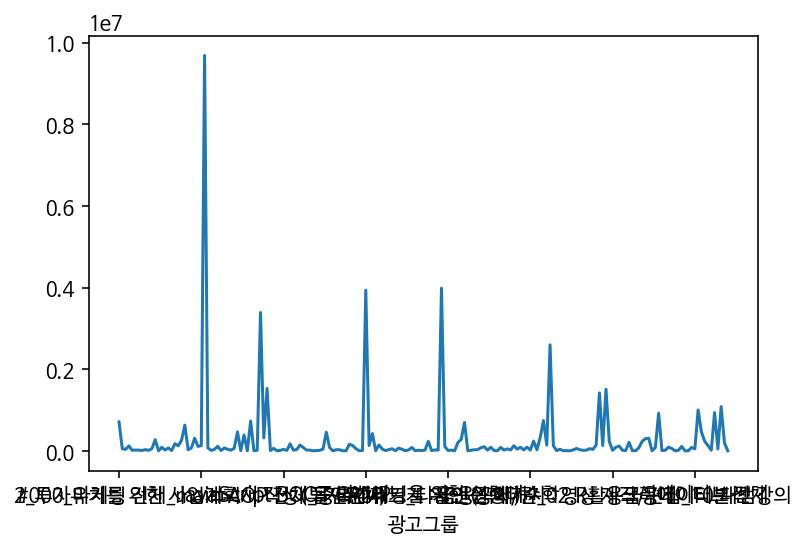

In [88]:
#노출수 칼럼 선그래프
df_group['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

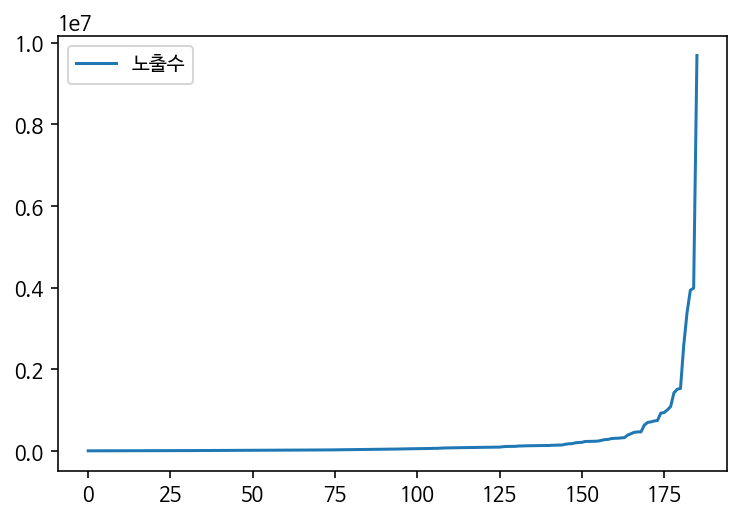

In [98]:
#노출수 칼럼 선그래프
#sort_values(),reset_index(),drop('index',axis=1),plot - 한줄 코딩(괄호사용)
df_group['노출수'].sort_values().reset_index().drop('광고그룹',axis=1).plot()
plt.show()

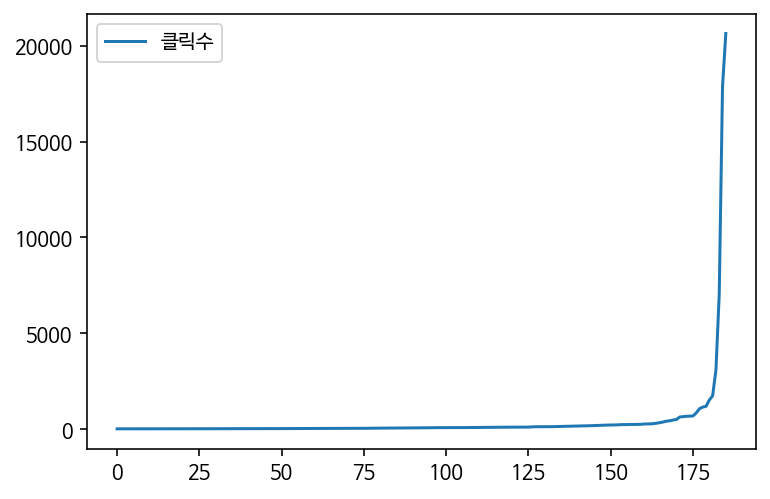

In [99]:
#클릭수 칼럼 선그래프
df_group['클릭수'].sort_values().reset_index().drop('광고그룹',axis=1).plot()
plt.show()

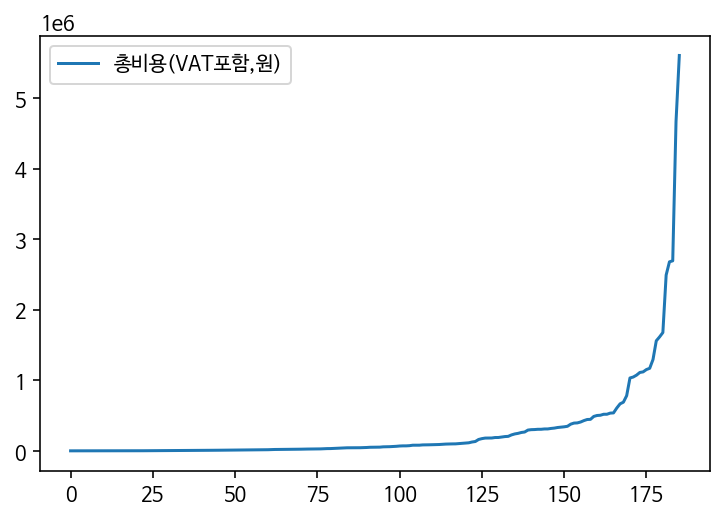

In [101]:
#총비용 칼럼 선그래프
df_group['총비용(VAT포함,원)'].sort_values().reset_index().drop('광고그룹',axis=1).plot()
plt.show()

### # 중점관리 광고그룹 / 저효율 광고그룹

- 중점관리 광고그룹
 1. 상위20%(노출수 80백분위수 이상)
 2. 상위10%(클릭수 90백분위수 이상)

In [102]:
#df_group에서 imp, clk 변수 생성
imp = df_group['노출수']
clk = df_group['클릭수']

In [103]:
#조건이 여러개일 경우 
#데이터프레임[(조건문)&(조건문)]
result = df_group[(imp>=imp.quantile(0.8)) & (clk>=clk.quantile(0.9))]

In [104]:
#index - 중점관리 광고그룹 출력
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹 : 
 노출수, 클릭수  기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹
 1. 노출수 80백분위수 미만
 2. 클릭수 90백분위수 미만
 3. 총비용 60백분위수 이상
 4. 총비용 90백분위수 미만

In [105]:
#df_group에서 cost 변수 생성
cost = df_group['총비용(VAT포함,원)']

In [106]:
#조건이 여러개일 경우 
#데이터프레임[(조건문)&(조건문)]
result = df_group[(imp < imp.quantile(0.8)) & (clk<clk.quantile(0.9)) & (cost >=cost.quantile(0.6)) & (cost<cost.quantile(0.9))]

In [107]:
#index - 저효율 광고그룹 출력
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')